In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#Carregamento dos Dados
dados = pd.DataFrame(
    {'pH': [3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 6.0, 2.0, 7.5, 4.5, 5.0, 2.8, 8.0],
        'Concentração': ['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída'],
        'Cheiro': ['Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro'],
        'Classe': ['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica']}
)

In [47]:
dados.head()

,pH,Concentração,Cheiro,Classe
0,3.0,Concentrada,Com Cheiro,Ácida
1,5.5,Diluída,Sem Cheiro,Básica
2,2.5,Concentrada,Com Cheiro,Ácida
3,7.0,Diluída,Sem Cheiro,Básica
4,4.0,Concentrada,Com Cheiro,Ácida


In [48]:
dados['Concentração'] = dados['Concentração'].map({
    'Concentrada':0,'Diluída':1
})
dados['Cheiro']= dados['Cheiro'].map({
    'Com Cheiro':2,'Sem Cheiro':3
})

In [49]:
# Dividir os dados
X = dados[['pH', 'Concentração', 'Cheiro']]
y = dados['Classe']

In [50]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [51]:
modelo = SVC(kernel= 'linear') # crio o modelo SVC
modelo.fit(X_train,y_train) # treino o modelo

SVC(kernel='linear')

In [52]:
y_pred = modelo.predict(X_test)

In [53]:
X_test

,pH,Concentração,Cheiro
9,7.5,1,3
11,5.0,1,3
0,3.0,0,2
12,2.8,0,2
5,6.5,1,3


In [57]:
dados.head(10)

,pH,Concentração,Cheiro,Classe
0,3.0,0,2,Ácida
1,5.5,1,3,Básica
2,2.5,0,2,Ácida
3,7.0,1,3,Básica
4,4.0,0,2,Ácida
5,6.5,1,3,Básica
6,3.5,0,2,Ácida
7,6.0,1,3,Básica
8,2.0,0,2,Ácida
9,7.5,1,3,Básica


In [58]:
#Calculo das métricas do algoritmo de Machine Learning
#Classification Report
acc = accuracy_score(y_pred,y_test)
acuracy = accuracy_score(y_pred,y_test)
print(acuracy)

1.0


In [59]:
#Matriz de Confusão
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[3 0]
 [0 2]]


Text(50.72222222222221, 0.5, 'Cheiro')

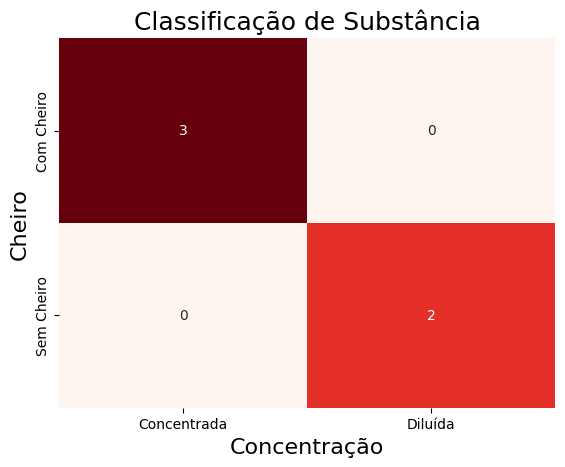

In [62]:
#Vizualizando a matriz de confusão de forma gráfica
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Concentrada', 'Diluída'], 
            yticklabels=['Com Cheiro', 'Sem Cheiro'])    
                         
plt.title('Classificação de Substância',fontsize=18)     
plt.xlabel('Concentração', fontsize=16)
plt.ylabel('Cheiro',fontsize=16)  

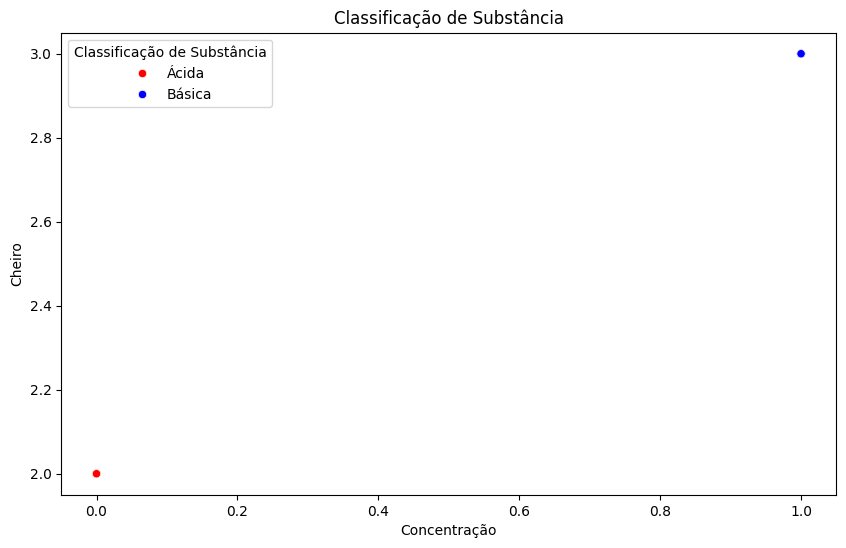

In [68]:
#Mapeando as cores com base na classe
palette = {"Ácida": "red", "Básica": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Concentração', y='Cheiro', hue='Classe', data=dados, palette= palette)

# Personalizando o gráfico
plt.title('Classificação de Substância')
plt.xlabel('Concentração')
plt.ylabel('Cheiro')

# Mostrando o gráfico
plt.legend(title='Classificação de Substância')
plt.show()